#Assignment:
Change the code 8 or your own 4th Code from Assignment 4 to include:

1.Image normalization

2.L2 regularization

3.ReLU after BN

Run your new code for 40 epochs and save the model with highest validation accuracy

Find out 25 misclassified images from the validation dataset and create an image gallery

#Mounting Google drive

accessing google drive / authendication

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# **Import Libraries and modules**

In [2]:
# https://keras.io/
!pip install -q keras                                                                                        
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

###Ploting the image

(60000, 28, 28)


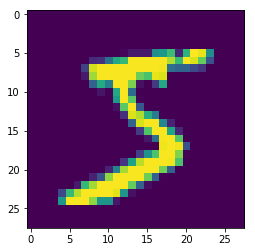

In [38]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

##Reshaping the x_train and x_test

####(Number of images,width,height,channels)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

##Normalization

Dividing by 255 , (highest value  of pixel )

In [0]:
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
# X_train /= 255
# X_test /= 255

#Pixel and Image Normalization

In [0]:
datagen = ImageDataGenerator(rescale= 1./255,    #Pixel normalization
                             featurewise_center=True,  #Image Normalization
                             featurewise_std_normalization=True  #Image normaliztion
                           
                              )
valid_datagen = ImageDataGenerator(rescale= 1./255,    #Pixel normalization
                                  featurewise_center=True,  #Image Normalization
                                  featurewise_std_normalization=True  #Image normaliztion
                                  )

In [0]:
datagen.fit(X_train)
valid_datagen.fit(X_test)

In [0]:

# datagen.flow(x, y=None, batch_size=32, shuffle=True, sample_weight=None,
#              seed=None, save_to_dir=None, save_prefix='', save_format='png', subset=None)
tr_gen = datagen.flow(X_train, Y_train, batch_size=64)
va_gen = valid_datagen.flow(X_test, Y_test, batch_size=64)

In [14]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

##Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [16]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

##Buiding a sequential model

In [17]:
from keras.layers import Activation, MaxPooling2D, BatchNormalization, Dropout
from keras import regularizers
# Model is built by stacking layers using keras sequential model


model = Sequential() 
model.add(Convolution2D(16, 3, 3, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(28,28,1))) #Receptive_Field=3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3,kernel_regularizer=regularizers.l2(0.01),  activation='relu')) #Receptive_Field=5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #Receptive_Field=10

model.add(Convolution2D(10,1,activation='relu')) #Receptive_Field=10
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3, kernel_regularizer=regularizers.l2(0.01), activation='relu')) #Receptive_Field=12
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3,kernel_regularizer=regularizers.l2(0.01),  activation='relu')) #Receptive_Field=14
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, kernel_regularizer=regularizers.l2(0.01), activation='relu')) #Receptive_Field=16
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10,1)) #Receptive_Field=18
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10,6)) #Receptive_Field=28
model.add(Flatten())                                                        
model.add(Activation('softmax'))                                            

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", kernel_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  import sys


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg..., activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), kernel_regularizer=<keras.reg..., activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg..., activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., activation="relu")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
__________

##Importing Model checkpoint

The model check point is used to store the model weight at specific points

In [0]:
from keras.callbacks import  ModelCheckpoint

filepath="/content/gdrive/My Drive/Colab Notebooks/EVA/5/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
#file path store weights in google drive

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# Store the weights when the validation accuracy increases

# Learning Rate scheduler

used to reduce the learning rate wrt epochs

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

##Compiling the model

categorical_crossentropy is used as loss function

Adam with learning rate of 0.001 is optimizer

Accuracy is taken as metric

In [0]:
# model.compile(optimizer, loss=None, metrics=None, loss_weights=None,
#               sample_weight_mode=None, weighted_metrics=None, target_tensors=None, **kwargs)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.003),
              metrics=['accuracy'])



##Fitting / Training the model

batch size  = 128 images
Epochs  =  10

In [0]:

# model.fit_generator(generator, steps_per_epoch=None, epochs=1, verbose=1, callbacks=None, validation_data=None, 
#                     validation_steps=None, class_weight=None, max_queue_size=10,
#                     workers=1, use_multiprocessing=False, shuffle=True, initial_epoch=0)

model.fit_generator(generator = tr_gen, steps_per_epoch=512,#len(X_train) / 64,
                    verbose=1,nb_epoch = 40,
                    callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)],
                     validation_data = va_gen,validation_steps=51,
                     )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<keras_pre..., steps_per_epoch=512, verbose=1, callbacks=[<keras.ca..., validation_data=<keras_pre..., validation_steps=51, epochs=40)`
  """


Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
512/512 [==============================] - 12s 24ms/step - loss: 0.4731 - acc: 0.9301 - val_loss: 8.6066 - val_acc: 0.1109

Epoch 00001: val_acc improved from -inf to 0.11091, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/5/epochs:001-val_acc:0.111.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
512/512 [==============================] - 8s 15ms/step - loss: 0.1813 - acc: 0.9694 - val_loss: 13.4607 - val_acc: 0.1023

Epoch 00002: val_acc did not improve from 0.11091
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
512/512 [==============================] - 8s 15ms/step - loss: 0.1401 - acc: 0.9758 - val_loss: 7.7951 - val_acc: 0.1982

Epoch 00003: val_acc improved from 0.11091 to 0.19822, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/5/epochs:003-val_acc:0.198.hdf5
Epoch 4/40

Epoch 00004: LearningRa

In [0]:
model.load_weights('/content/gdrive/My Drive/Colab Notebooks/EVA/5/epochs:020-val_acc:0.952.hdf5')

model.compile(loss='categorical_crossentropy',
             optimizer=keras.optimizers.Adam(lr=0.000001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
             metrics=['accuracy'])

In [48]:
score = model.evaluate_generator(va_gen, steps = 10,verbose=0)
print(score)
score = model.evaluate_generator(va_gen, steps = 10,verbose=0)
print(score)
score = model.evaluate_generator(va_gen, steps = 10,verbose=0)
print(score)
score = model.evaluate_generator(va_gen, steps = 10,verbose=0)
print(score)
score = model.evaluate_generator(va_gen, steps = 10,verbose=0)
print(score)
score = model.evaluate_generator(va_gen, steps = 10,verbose=0)
print(score)
score = model.evaluate_generator(va_gen, steps = 10,verbose=0)
print(score)

[0.14773046607906754, 0.9628378378378378]
[0.15069399066269398, 0.959375]
[0.236541960388422, 0.9390625]
[0.16072018966078758, 0.9484375]
[0.17624227255582808, 0.9515625]
[0.14944967105984688, 0.95625]
[0.1667075462639332, 0.9625]


In [41]:
X_test = X_test.astype('float32')
X_test /= 255
score = model.evaluate(X_test,Y_test)#, steps = 10,verbose=0)
print(score)

10000/10000 [==============================] - 1s 127us/step
[0.9759456423997879, 0.9332]


In [49]:

score = model.evaluate(X_test,Y_test)#, steps = 10,verbose=0)
print(score)

10000/10000 [==============================] - 1s 117us/step
[0.9759456423997879, 0.9332]


In [0]:
# X_test = (X_test - X_test.mean() )/X_test.std()
# score = model.evaluate(X_test,Y_test)#, steps = 10,verbose=0)
# print(score)


In [0]:
pred = model.predict(X_test)
# pred = model.predict_generator(va_gen,steps = 5)

In [53]:
pred= pred.round()
pred[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

##Creating a data frame

In [0]:
import pandas as pd
comp = pd.DataFrame()

In [59]:
comp['y_test'] = y_test
comp['pred']= np.argmax(pred,axis=1)
comp.head()

,y_test,pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [0]:
m = []
for i,j in zip(comp['y_test'],comp['pred']):
  if i == j:
    r = 'correct'
  else :
    r = 'misclassified'
  m.append(r)
  
comp['Result'] = m

In [62]:
comp.head()

,y_test,pred,Result
0,7,7,correct
1,2,2,correct
2,1,1,correct
3,0,0,correct
4,4,4,correct


##indexing the misclassified images

In [64]:

mis =[]
corr = []
for i in range(len(y_test)):

  if (Y_test[i] == pred[i]).all():
    corr.append(i)

  else :
    mis.append(i)

print(len(corr))
print(len(mis))

9332
668


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [92]:
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))

Statistics train=33.318 (78.567), test=33.791 (79.172)


In [0]:
mis_class = []
for i in mis:
  mis_class.append(y_test[i])

#Visualization of misclassified images class wise 

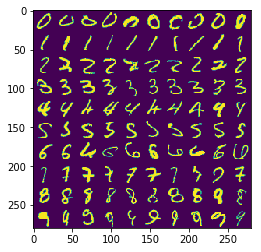

In [135]:
zero=[];one=[];two=[];three=[];four=[];five=[];six=[]
seven=[]
eight=[]
nine=[]

for i,c in zip(mis,mis_class):
#   plt.imshow(X_test[i])
#   plt.show()
  if c == 0:
    zero.append(X_test[i])
  if c == 1:
    one.append(X_test[i])
  if c == 2:
    two.append(X_test[i])
  if c == 3:
    three.append(X_test[i])
  if c == 4:
    four.append(X_test[i])
  if c == 5:
    five.append(X_test[i])
  if c == 6:
    six.append(X_test[i])
  if c == 7:
    seven.append(X_test[i])
  if c == 8:
    eight.append(X_test[i])
  if c == 9:
    nine.append(X_test[i])
  
for i in one[1:10]:
    output_0 = np.concatenate((zero[:10]),axis = 1)
    output_1 = np.concatenate((one[:10]),axis = 1)
    output_2 = np.concatenate((two[:10]),axis = 1)
    output_3 = np.concatenate((three[:10]),axis = 1)
    output_4 = np.concatenate((four[:10]),axis = 1)
    output_5 = np.concatenate((five[:10]),axis = 1)
    output_6 = np.concatenate((six[:10]),axis = 1)
    output_7 = np.concatenate((seven[:10]),axis = 1)
    output_8 = np.concatenate((eight[:10]),axis = 1)
    output_9 = np.concatenate((nine[:10]),axis = 1)
    
output  = np.concatenate((output_0,output_1,output_2,output_3,output_4,output_5,output_6,output_7,output_8,output_9),axis =0)


plt.imshow(output)
plt.show()

#Visualization of Misclassified count wrt class

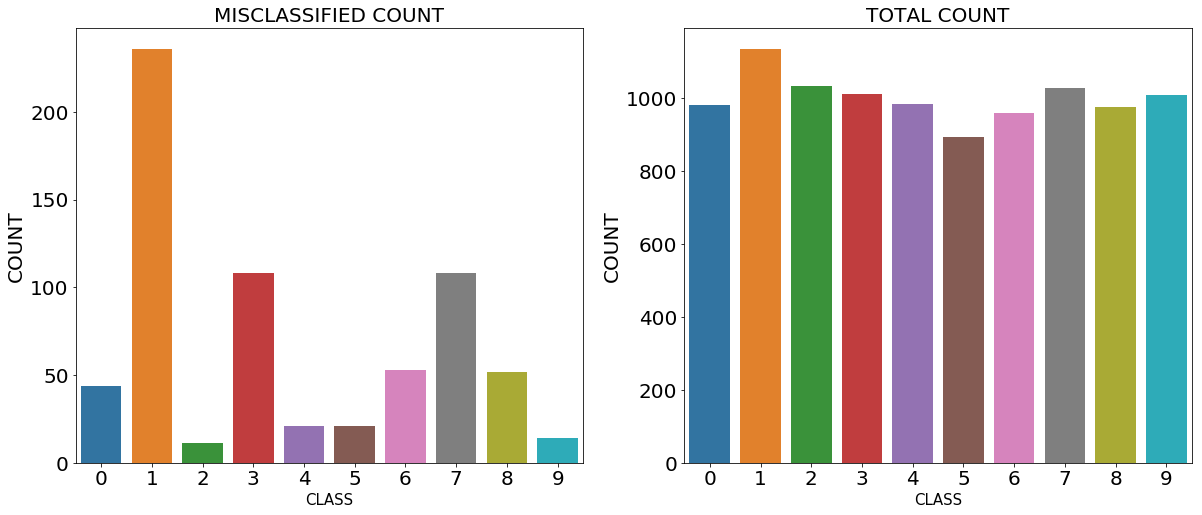

In [145]:

f,(ax1,ax2) =plt.subplots(figsize=(20,8),
                   nrows=1, ncols=2, sharex=False, sharey=False, 
                   squeeze=True, subplot_kw=None, gridspec_kw=None)
sns.countplot(error['mis_class'] ,ax =ax1)
ax1.set_xlabel('CLASS', fontsize=15)
ax1.set_ylabel('COUNT', fontsize=20)
ax1.set_title('MISCLASSIFIED COUNT', fontsize=20)
ax1.tick_params(labelsize=20)

sns.countplot(y_test,ax = ax2)
ax2.set_xlabel('CLASS', fontsize=15)
ax2.set_ylabel('COUNT', fontsize=20)
ax2.set_title('TOTAL COUNT', fontsize=20)
ax2.tick_params(labelsize=20)

##Class 1 and class 7 has high Misclassification